# U.S. Medical Insurance Costs

Project by TheJJSerg, Truong, Sunilyr, and Sug900

This group came together via Codecademy's Data Science Career Track. The first unit of the course, Data Science Foundations 1, revolved around learning and practicing Python fundamentals on U.S. Medical Insurance Data.

This project will be using the learned Python funamental techniques learned in the course to analyze data from a CSV file with medical insurance cost. We will be going over the following prompts:
1. 
2. 
3. 

In [1]:
# Import necessary libraries
import csv # Python library used for reading and writing tabular data in CSV format.
import pandas as pd # Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
import json # Python library for encoding and decoding custom objects by using JSON encoder and decoder classes.
import numpy # Python library for adding support to large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import statistics as stat #Python library for statistical operations
import matplotlib.pyplot as plt # Python library for creating graphs
from scipy import stats # Python library for linear regression
# Note to Team - I don't know if it's best practice to include all of these libraries. I'm not sure which ones we will need for the project. I just included all of the libraries I am familiar with to cover our bases. - TheJJSerg

This project will use the following Python libraries:
* csv, this library is used for reading and writing tabular data in CSV format.
* pandas, this library is used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
* json, this library is used for encoding and decoding custom objects by using JSON encoder and decoder classes.
* numpy, this library is used for adding support to large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

## An Overview of the Data
The data for this project can be found on [Kaggle, Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance). There are 7 columns:
1. age - age of primary beneficiary
2. sex - insurance contractor gender: male or female
3. bmi - Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 24.9
4. children - number of children covered by health insurance, ie - the number of dependents
5. smoker - represents if the primary beneficiary is a smoker: yes or no
6. region - the beneficiary's residential area in the US: northeast, southeast, southwest, or northwest
7. charges - individual medical costs billed by the health insurance

There are 1,338 observations in the dataset. There are no NA values in the dataset, and the types of the columns in the DataFrame look to be accurately predicted. Therefore, there will be little to no data cleaning. 

The inspiration of the dataset is the question, "Can you accurately predict insurance costs?"

Our team will observe the question along with the following:
1. a
2. b
3. c

### Assign Variable Names
First, we will read the csv file, and then, we will assign variables to conduct analysis on the dataset.

In [2]:
# Read the insurance.csv using the pandas library
insurance = pd.read_csv("insurance.csv")

# Define a function to load data into lists
def load_data(empty_list, column):
    for row in insurance[column]:
        empty_list.append(row)
    return empty_list

# Define the empty lists
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

# Use the function to load data to the empty lists
load_data(age, "age")
load_data(sex, "sex")
load_data(bmi, "bmi")
load_data(children, "children")
load_data(smoker, "smoker")
load_data(region, "region")
load_data(charges, "charges")

[16884.924,
 1725.5523,
 4449.462,
 21984.47061,
 3866.8552,
 3756.6216,
 8240.5896,
 7281.5056,
 6406.4107,
 28923.13692,
 2721.3208,
 27808.7251,
 1826.843,
 11090.7178,
 39611.7577,
 1837.237,
 10797.3362,
 2395.17155,
 10602.385,
 36837.467,
 13228.84695,
 4149.736,
 1137.011,
 37701.8768,
 6203.90175,
 14001.1338,
 14451.83515,
 12268.63225,
 2775.19215,
 38711.0,
 35585.576,
 2198.18985,
 4687.797,
 13770.0979,
 51194.55914,
 1625.43375,
 15612.19335,
 2302.3,
 39774.2763,
 48173.361,
 3046.062,
 4949.7587,
 6272.4772,
 6313.759,
 6079.6715,
 20630.28351,
 3393.35635,
 3556.9223,
 12629.8967,
 38709.176,
 2211.13075,
 3579.8287,
 23568.272,
 37742.5757,
 8059.6791,
 47496.49445,
 13607.36875,
 34303.1672,
 23244.7902,
 5989.52365,
 8606.2174,
 4504.6624,
 30166.61817,
 4133.64165,
 14711.7438,
 1743.214,
 14235.072,
 6389.37785,
 5920.1041,
 17663.1442,
 16577.7795,
 6799.458,
 11741.726,
 11946.6259,
 7726.854,
 11356.6609,
 3947.4131,
 1532.4697,
 2755.02095,
 6571.02435,
 4441

## Gustavo's Section
1. Calculate the average age of the patients
2. Investigate where are the patients from
3. Look at cost betwween smokers and non-smokers

This first section creates a list to handle the data

In [3]:
def insurance_file_manager():
    with open ("insurance.csv") as insurance_data:
        insurance_cost = csv.DictReader(insurance_data)
        insurances = []
        for items in insurance_cost:
            insurances.append(items)
    return insurances
insurance_list = insurance_file_manager()

In [4]:
#Using stats mean method to calculate the average age
avg_age = round(stat.mean(age),2)
print(f'The average age of the patients is {avg_age} years old')

The average age of the patients is 39.21 years old


In [5]:
#Using stats mode method to calculate the most common region
region_mode = stat.mode(region)
print(f'The majority of the patients come from {region_mode}')


The majority of the patients come from southeast


In [6]:
def insurance_smoker_manager(insurance_list):
    #starting counter of smokers & non-smokers cost
    charges_smokers = 0
    charges_non_smokers = 0
    #loop to go through the list for smokers and non skomers
    for items in insurance_list:
        if items["smoker"] == "yes":
            charges_smokers = charges_smokers + float(items["charges"])
        if items["smoker"] == "no":
            charges_non_smokers = charges_non_smokers + float(items["charges"])
    #calculate the average of cost for both groups
    avg_smokers = charges_smokers/len(insurance_list)
    avg_non_smokers = charges_non_smokers/len(insurance_list)
    #print results
    print("Smokers Average Insurance Cost is: " + str(round(avg_smokers,2)))
    print("Non Smokers Average Insurance Cost is: " + str(round(avg_non_smokers,2)))
insurance_smoker_manager(insurance_list)

Smokers Average Insurance Cost is: 6563.35
Non Smokers Average Insurance Cost is: 6707.07


## TheJJSerg's Section
Linear Regression is a statistical model which estimates the linear relationshiop between a scalar response and one or more explantory variables. The general formula for linear regression is 

```
y = m*x + b
``` 
`m` is the slope of the line, and `b` is the intercept, where the line crosses the y-axis.

We will first define simple linear regressions, which is one variable (the independent variable) attempting to estimate the dependent variable.

The independent variables will be 
1. age
2. sex
3. bmi
4. children
5. smoker
6. region

`charges` will be the dependent variable, as we will be trying to estimate it using the independent variables above. We will be finding the line of best fit by trial-and-error

### Initial Steps to Perform Simple Linear Regressions

In [25]:
# Create a list of possible `m` values and `b` values
possible_ms = [number for number in range(0, 11)]
possible_bs = [number for number in range(0, 21)]

# Define the get_y function
def get_y(m, b, x):
    y = m*x + b
    return y

# Define the calculate_error function
def calculate_error(m, b, point):
    # Define the point values
    x_point = point[0]
    y_point = point[1]
    
    # Call the get_y function
    get_y_point = get_y(m = m, x = x_point, b = b)
    
    # Find the difference, or the error, between the linear regression line and the actual value
    difference = y_point - get_y_point
    
    # Find the absolute value of the difference and define as the error
    error = abs(difference)
    
    # Return the error
    return error

# Define the calculate_all_error function
def calculate_all_error(m, b, data):
    error = 0
    for point in data:
        current_error = calculate_error(m, b, point)
        error += current_error
        
    return error

# Define the datapoints function
def datapoints(x_points, y_points):
    data = []
    for i in range(len(x_points)):
        data.append((x_points[i], y_points[i]))
        
    return data

# Define the simple linear regression function
def simple_linear_regression(independent, independent_word, dependent = charges):
    data = datapoints(independent, dependent)
    # Define smallest_error as infinity so that the first error will be smallest
    smallest_error = float("inf")

    # Define the line of best fit variables
    best_m = 0
    best_b = 0
    
    for m in possible_ms:
        for b in possible_bs:
            error = calculate_all_error(m, b, data)
            
            if error < smallest_error:
                smallest_error = error
                best_m = m
                best_b = b
                
    print("The best m is " + str(best_m))
    print("The best b is " + str(best_b))
    print("The Linear Regression Line is ")
    print("charges = " + str(round(best_m, 2)) + " * " + independent_word + " + " + str(round(best_b, 2)))
    print("The smallest error is " + str(round(smallest_error, 2)))

### Simple Linear Regression Calculations

We will now perform simple linear regression calculations

#### Simple Linear Regression for Age to Estimate Charges

In [27]:
simple_linear_regression(age, "age")
# When m is -10, 10
#The best m is 10.0
#The best b is 20.0
#The smallest error is 17204474.990758996

# m is -100
#The best m is 100
#The best b is 100
#The smallest error is 12464589.721659007

The best m is 10
The best b is 20
The Linear Regression Line is 
charges = 10 * age + 20
The smallest error is 17204474.99


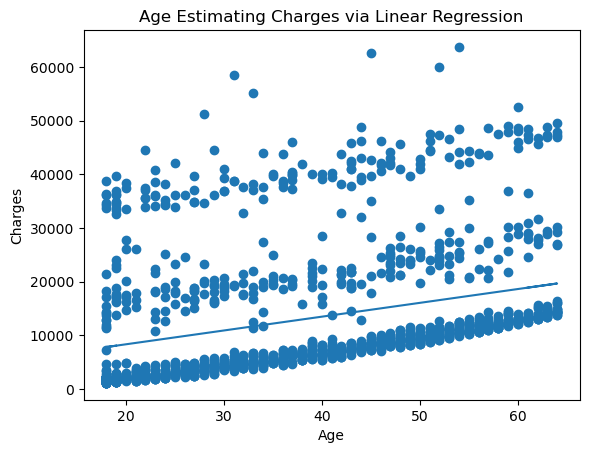

The Linear Regression Line is 
charges = 257.72 * age + 3165.89
R is 0.299
Standard Error is 22.502


In [34]:
# TheJJSerg Changes
# My Changes

# Define the Linear Regression formula
def myfunc(x):
    return slope * x + intercept

def simple_linear_regression(x, x_word, y = charges):
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    model = list(map(myfunc, x))
    plt.scatter(x, y)
    plt.plot(x, model)
    
    # Label the graph
    plt.title(x_word.title() + " Estimating Charges via Linear Regression")
    plt.xlabel(x_word.title())
    plt.ylabel("Charges")
    plt.show()
    print("The Linear Regression Line is ")
    print("charges = " + str(round(slope, 2)) + " * " + str(x_word) + " + " + str(round(intercept, 2)))
    print("R is " + str(round(r, 3)))
    print("Standard Error is " + str(round(std_err, 3)))
    return [slope, intercept, r, p, std_err]

simple_linear_regression_age = simple_linear_regression(x = age, x_word = "age")

# Sunil's Section
#13 Figure out what the average age is for someone who has at least one child in this dataset


In [10]:
def average_age_with_children():
    age_and_children = list(zip(age, children)) #Merge age and children lists using zip; make sure to convert
    with_children = [] #Empty list for storing the ages of subjects with 1 or more children

    for subject in age_and_children:
        if subject[1] > 0:
            with_children.append(subject[0])
            
    mean_age_with_kids = round(sum(with_children)/len(with_children), 2) #Calculate mean age
    return mean_age_with_kids


print('The average age for a person with at least one child in this dataset is', average_age_with_children(), "years.")


The average age for a person with at least one child in this dataset is 39.78 years.
